## Marketing Analytics
#### Tujuan umum :
    Kamu merupakan seorang data analis dan diberi tugas oleh Manajer Pemasaran untuk menganalisa data pemasaran dengan tujuan meningkatkan performa pemasaran ke depannya. Hasil akhir yang diharapkan kamu dapat memberikan masukan/solusi berdasarkan data yang ada.
#### Mengenai data :
    Data yang digunakan merupakan publik dataset yang saya peroleh dari kaggle. Dataset ini sendiri dibentuk oleh salah satu perusahaan start up di brazil untuk menguji kandidat data analyst, maka dari itu saya cukup tertarik untuk menganalisa data ini. 
#### Bagian 01 : Exploratory Data Analysis
    - Cek apakah format data sudah sesuai
    - Cek apakah ada data yang kosong dan outliers(data yang bernilai ekstrem), jika ada bagaimana mengatasinya?
    - Apakah ada variabel baru yang bisa memberikan insight lebih?
    - Apakah ada pola aneh dalam data? Bisakah kamu memperlihatkannya?
    - Apakah ada relasi antara latar belakang/kondisi pelanggan terhadap kebiasaan berbelanja?   
#### Bagian 02 : Data Visualization
    - Kampanye iklan mana yang paling sukses?
    - Gambaran umum mengenai latar belakang pelanggan 
    - Produk apa yang banyak diminati pelanggan?
    - Melalui apa pelanggan banyak berbelanja?(Toko, Website, Katalog, Diskon)
    - Bagaimana relasi antara respon terhadap iklan dengan jumlah tanggungan?
    - Bagaimana relasi antara pengeluaran dengan jumlah tanggungan?


#### Dataset
Import dataset ke python dan lihat gambaran umum mengenai data. Dataset dapat di download terlebih dari melalui [Link](https://www.kaggle.com/datasets/jackdaoud/marketing-data) tertera.

In [1]:
# load python library
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# import dataset to python

df = pd.read_csv('D:\Data analytics\Projects\marketing analytics\ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [3]:
df_copy = df.copy()

#### Bagian 01 : Exploratory Data Analysis
    
* Cek apakah format data sudah sesuai?

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

-Dari hasil diatas, tidak ditemukan format yang melenceng dari tipe data yang seharusnya. Maka tidak diperlukan untuk melakukan perubahan data.

* Melakukan pengecekan apakah ada nilai null atau tidak dalam dataset. 
Nilai Null dapat berdampak pada hasil analisis sehingga penting sekali untuk mengatasi hal ini terlebih dahulu.

In [5]:
df_copy.isnull().sum().sort_values(ascending=False)

Income                  0
marital_Together        0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Widow           0
Complain                0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
Z_CostContact           0
AcceptedCmp2            0
Kidhome                 0
MntGoldProds            0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
AcceptedCmp1            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmpO

Observasi :
Setelah dilakukan pengecekan di seluruh kolom, tidak ditemukan nilai null. Oleh karena itu tidak perlu kita lakukan tindakan.

* Duplikasi dalam data
Jika ada data yang terduplikasi, maka hal tersebut akan memberikan dampak misinformasi dan hal tersebut bisa menjadi hal fatal dalam memberi keputusan.

In [6]:
# Cek nilai duplikasi dalam data
df_copy.duplicated().sum()

184

* Terdapat 184 baris yang terduplikasi atau bernilai sama. Langkah yang tepat dalam adalah menghilangkan nilai duplikasi tersebut.

In [7]:
# Kita hilangkan nilai duplikat dalam data
df_copy.drop_duplicates(keep=False, inplace=True)
df_copy.shape

(1843, 39)

* Setelah menghilangkan data yang duplikat, dimensi data menjadi 1843 baris dibandingkan dengan sebelumnya sebanyak 2205 baris. Artinya data yang duplikat sudah tidak ada.

In [8]:
df_copy.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35683.000000,0.000000,0.000000,24.000000,23.500000,2.000000,16.000000,2.500000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000
75%,68145.000000,1.000000,1.000000,74.000000,508.000000,33.000000,225.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.500000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


Observasi : Untuk memahami describe perlu mengerti terlebih dahulu mengenai dataset. Describe dapat menjadi screening awal untuk mengetahui apakah ada keanehan pada dataset yang sedang diolah. Contoh untuk kasus ini, data marital dan education diberikan nilai 0 dan 1 dimana 1 bernilai benar. Jika kita menemukan nilai lebih dari 1 maka data perlu dibersihkan.

In [9]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

* Outlier merupakan data observasi yang memiliki nilai ekstrem
Dalam melakukan analisis khususnya machine learning, nilai outlier dapat mengurangi keakuratan analisa sehingga hasil yang diperoleh bisa memberikan keputusan yang keliru. Umumnya nilai outlier terjadi karena kesalahan input, salah pengukuran, dsb.  

In [10]:
# Hilangkan variabel yang tidak kita butuhkan
remove_columns = ['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD','AcceptedCmpOverall','MntTotal']
df_outlier = df_copy.drop(columns=remove_columns)
df_outlier.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
       'MntRegularProds'],
      dtype='object')

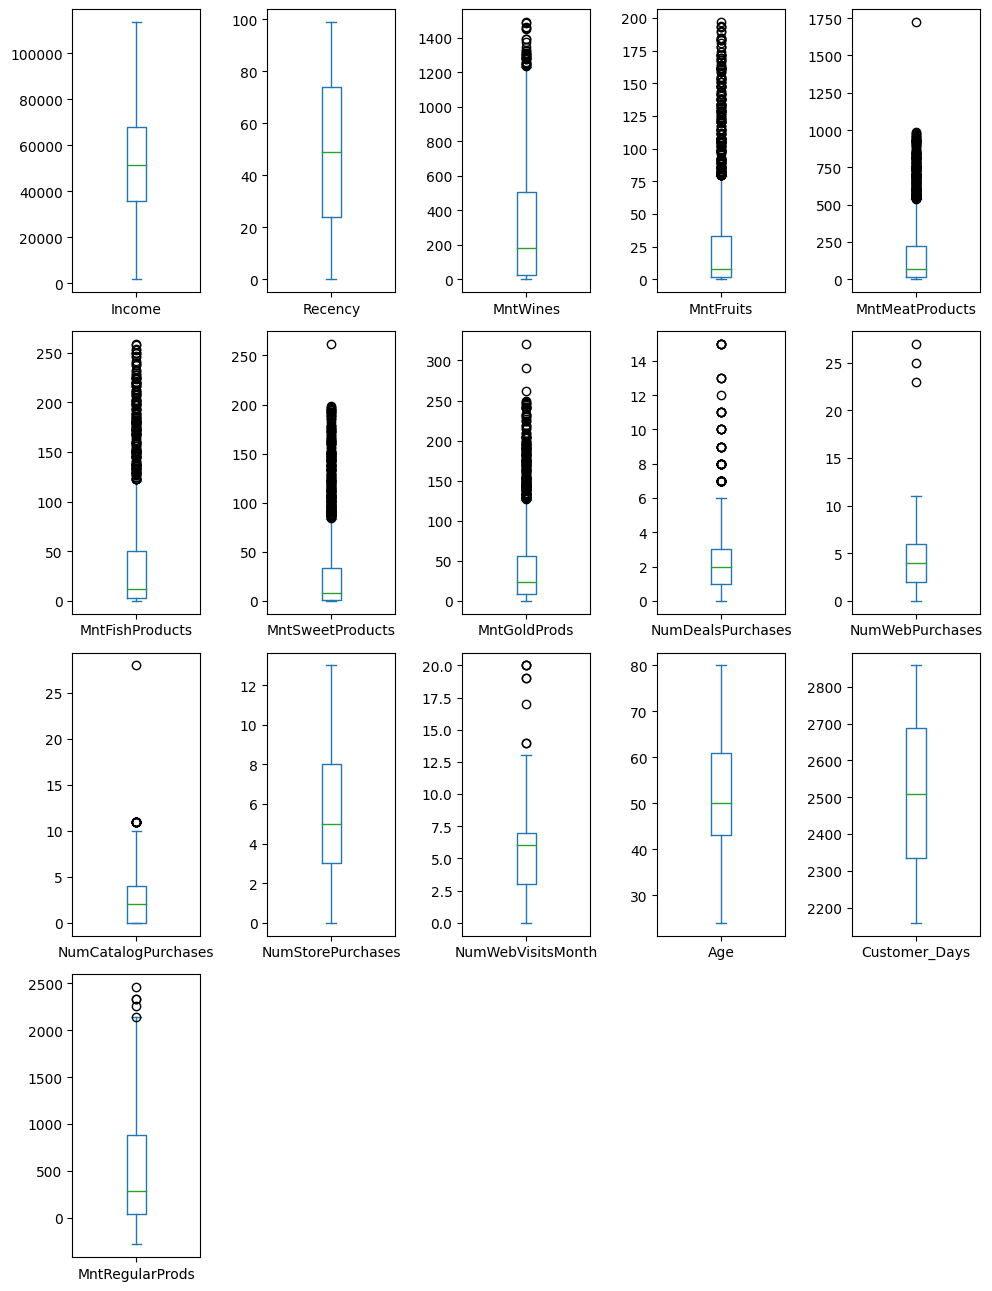

In [11]:
# Boxplot dapat digunakan untuk mengetahui apakah ada outliers dalam data
df_outlier.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

Beberapa hal kita ketahui :
* Variabel 'Mnt' atau pengeluaran memiliki banyak sekali outliers. Jika outliers banyak maka keputusan yang dapat kita adalah menetapkan bahwa outlier dengan jumlah yang banyak terjadi karena ada hal yang bersifat kasuistik sehingga data menjadi seperti itu. 

* Variabel dengan sedikit outliers akan kita ganti nilainya berdasarkan nilai median.  
[sumber](https://pacmann.io/blog/cara-mendeteksi-dan-menangani-outlier-saat-melakukan-data-analysis)

Tindakan Mengatasi outlier yang saya gunakan menggunakan Jangkauan antar kuartil(IQR) dimana nilai diatas batas atas akan kita ganti dengan nilai median

In [12]:
# Mengganti nilai outliers Variabel NumDealsPurchases
deals_median = df_outlier['NumDealsPurchases'].median()
Q1 = df_outlier['NumDealsPurchases'].quantile(0.25)

Q3 = df_outlier['NumDealsPurchases'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR


In [13]:
df_copy['NumDealsPurchases'] = np.where(df_copy['NumDealsPurchases'] >deals_outlier, deals_median,df_copy['NumDealsPurchases'])

In [14]:
# Mengganti nilai outliers Variabel NumWebPurchases
web_median = df_outlier['NumWebPurchases'].median()
Q1 = df_outlier['NumWebPurchases'].quantile(0.25)

Q3 = df_outlier['NumWebPurchases'].quantile(0.75)

IQR = Q3 - Q1

web_outlier = Q3 + 1.5*IQR

In [15]:
df_copy['NumWebPurchases'] = np.where(df_copy['NumWebPurchases'] >web_outlier, web_median,df_copy['NumWebPurchases'])

In [16]:
# Mengganti nilai outliers Variabel NumCatalogPurchases
catalog_median = df_outlier['NumCatalogPurchases'].median()
Q1 = df_outlier['NumCatalogPurchases'].quantile(0.25)

Q3 = df_outlier['NumCatalogPurchases'].quantile(0.75)

IQR = Q3 - Q1

catalog_outlier = Q3 + 1.5*IQR

In [17]:
df_copy['NumCatalogPurchases'] = np.where(df_copy['NumCatalogPurchases'] >catalog_outlier, catalog_median,df_copy['NumCatalogPurchases'])

In [18]:
# Mengganti nilai outliers Variabel NumCatalogPurchases
webvis_median = df_outlier['NumWebVisitsMonth'].median()
Q1 = df_outlier['NumWebVisitsMonth'].quantile(0.25)

Q3 = df_outlier['NumWebVisitsMonth'].quantile(0.75)

IQR = Q3 - Q1

webvis_outlier = Q3 + 1.5*IQR

In [19]:
df_copy['NumWebVisitsMonth'] = np.where(df_copy['NumWebVisitsMonth'] >webvis_outlier, web_median,df_copy['NumWebVisitsMonth'])

In [20]:
# Mengganti nilai outliers Variabel MntRegularProds
regular_median = df_outlier['MntRegularProds'].median()
Q1 = df_outlier['MntRegularProds'].quantile(0.25)

Q3 = df_outlier['MntRegularProds'].quantile(0.75)

IQR = Q3 - Q1

regular_outlier = Q3 + 1.5*IQR

In [21]:
df_copy['MntRegularProds'] = np.where(df_copy['MntRegularProds'] >regular_outlier, regular_median,df_copy['MntRegularProds'])

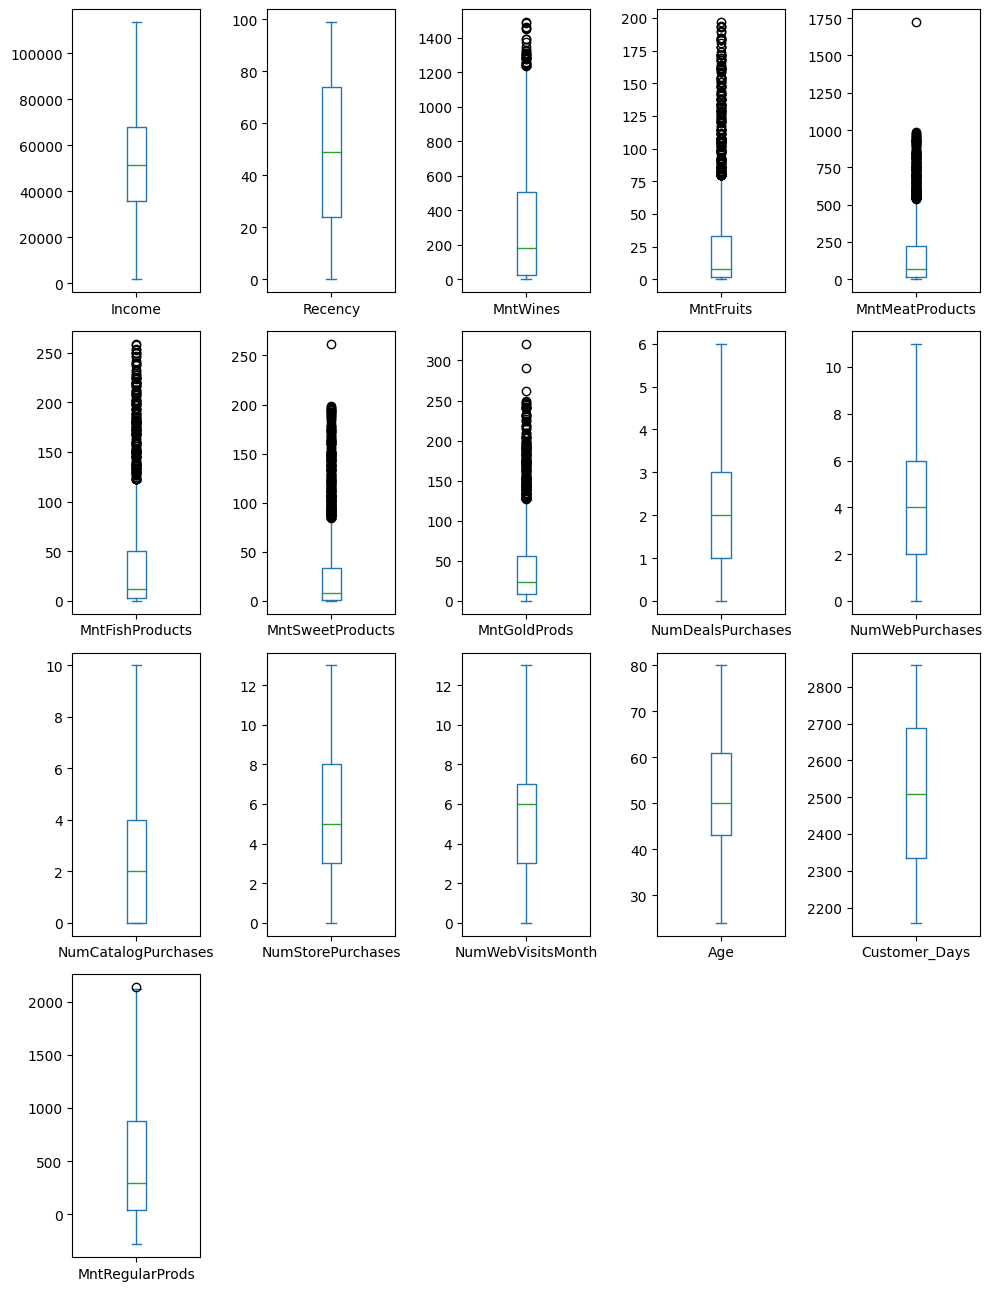

In [22]:
# Kita Cek kembali apakah Outlier masih ada

df_outlier_cleaned = df_copy.drop(columns=remove_columns)

df_outlier_cleaned.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

Beberapa variabel yang memiliki Outliers yang sedikit sudah ditangani. 
Langkah selanjutnya membuat variabel baru yang dapat memberikan insight ke depannya.


In [23]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [24]:
# Total dependents variabel
df_copy['dependents'] = df_copy['Kidhome'] + df_copy['Teenhome']

# Total Purchases variabel
df_copy['TotPurchases'] = df_copy[[col for col in df_copy.columns if 'Purchases' in col]].sum(axis=1)

# Total Accepted Campaign variabel
df_copy['TotAccCamp'] = df_copy[[col for col in df_copy.columns if 'Cmp' in col]].sum(axis=1)

# 2n cycle dan master merupakan variabel yang sama, jadi kita satukan dalam variabel yang sama
df_copy['education_MasterDegree'] = df_copy['education_2n Cycle'] + df_copy['education_Master']


In [25]:
df_copy.drop(columns=["education_2n Cycle","education_Master"], inplace=True)

* Uji Korelasi yang akan dilakukan menggunakan correlation matrix.
Fokus Uji Korelasi :
1. Income dan dependents terhadap Purchases
2. Marital Status terhadap Purchases
3. Education terhadap Purchases

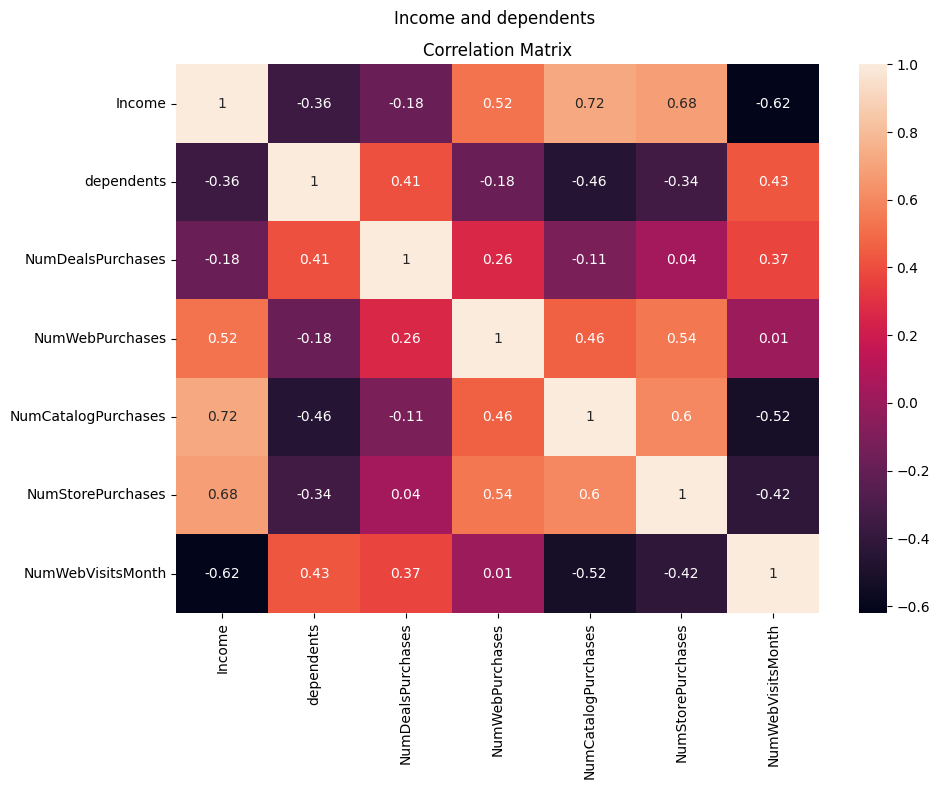

In [26]:
# Income dan dependents terhadap Purchases

df_indep = pd.DataFrame(df_copy[['Income','dependents','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Income and dependents')
plt.tight_layout()

Observasi :
1. Variabel Income cenderung memiliki korelasi positif terhadap pembelian melalui website, katalog dan Toko. Artinya ada relasi semakin tinggi pendapatan seseorang maka kebiasaan untuk membeli juga meningkat.
2. Variabel dependents atau jumlah tanggungan hanya memiliki korelasi positif terhadap pembelian Deals/Diskon, artinya pelanggan yang memiliki anak lebih prefer berbelanja apabila ada deals/diskon
3. Hal yang menarik lainnya adalah jumlah kunjungan ke website tidak memiliki korelasi berarti terhadap variabel WebPurchases, tetapi memiliki korelasi positif terhadap pembelian Deals/Diskon. Asumsi pertama bahwa jika traffic website tinggi maka pembelian melalui website juga akan mengikuti, namun ternyata tidak. Variabel kunjungan website juga memiliki korelasi positif terhadap jumlah tanggungan, asumsi yang bisa diambil adalah pelanggan yang memiliki jumlah tanggungan lebih sering mengunjungi website untuk mendapatkan informasi deals/diskon.

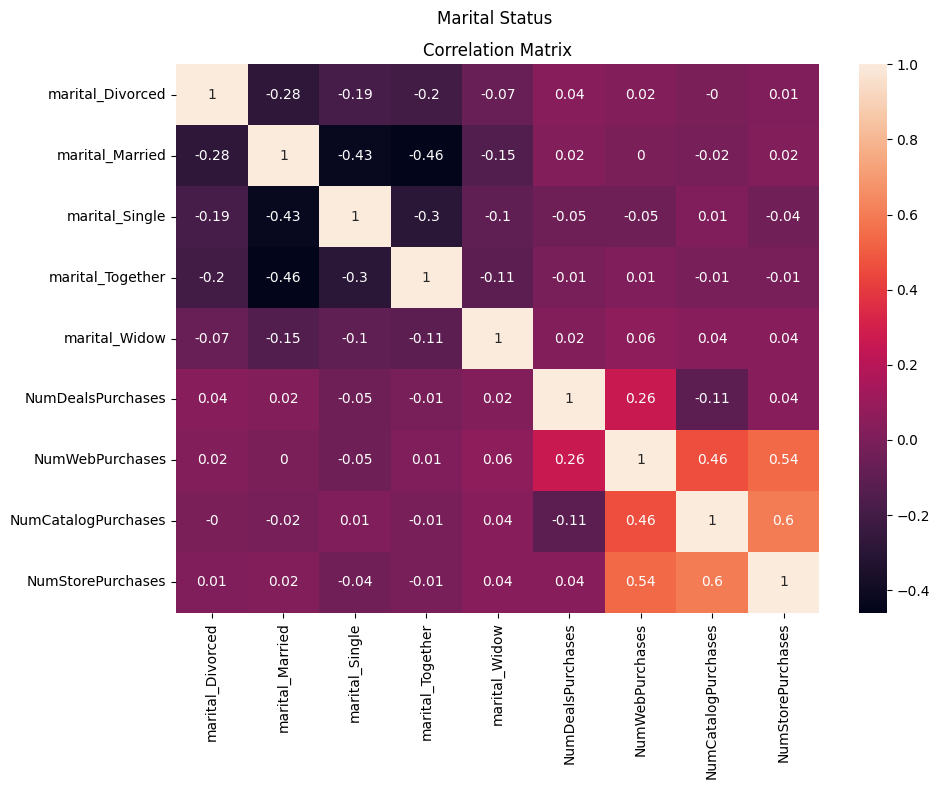

In [27]:
# Marital status terhadap Purchases
df_marital = pd.DataFrame(df_copy[['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']])

plt.figure(figsize=(10,8))
sns.heatmap(df_marital.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Marital Status')
plt.tight_layout()

Observasi :
* Secara keseluruhan Variabel Marital Status tidak memiliki korelasi yang berarti terhadap variabel Purchases apapun itu. Namun sebagai analis kita perlu melakukan penelitian lebih lanjut. langkah selanjutnya untuk mendapatkan insight, kita dapat menggunakan visualisasi pada bagian 2 pada laporan ini.

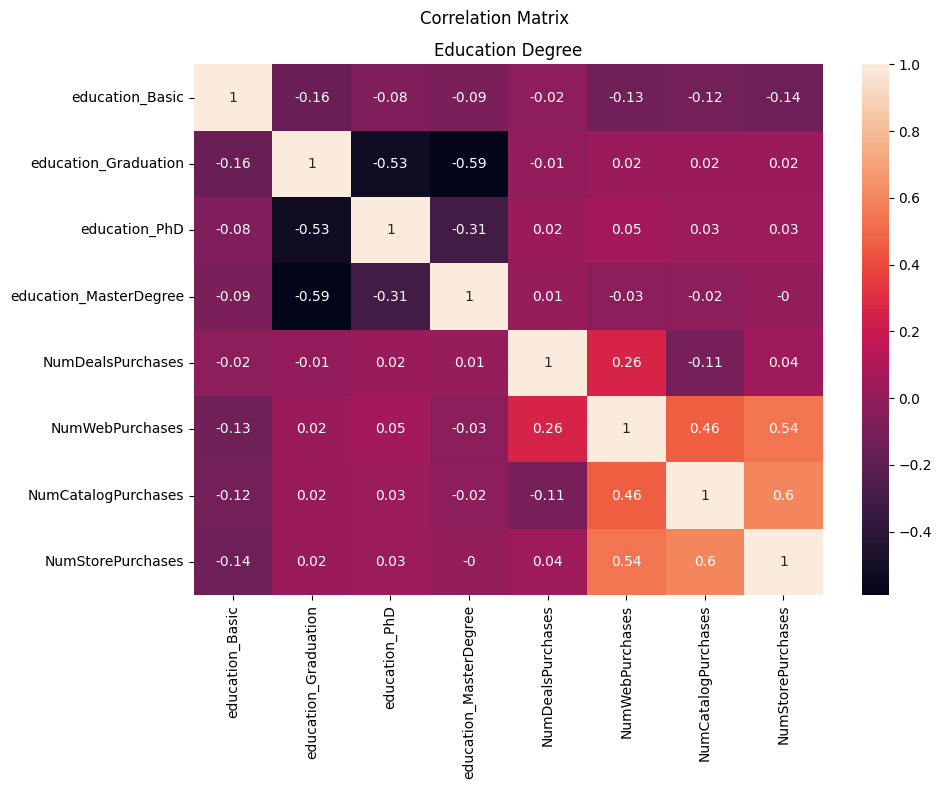

In [28]:
# Education level terhadap Purchases
df_education = pd.DataFrame(df_copy[['education_Basic', 'education_Graduation', 'education_PhD','education_MasterDegree',
       'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']])

plt.figure(figsize=(10,8))
sns.heatmap(df_education.corr().round(2),annot=True)
plt.suptitle('Correlation Matrix')
plt.title('Education Degree')
plt.tight_layout()       

Observasi :
* Tingkat Pendidikan juga memberikan hasil tidak ada korelasi yang berarti antara tingkat pendidikan dengan banyaknya pembelian. Hasil ini juga sama dengan marital status maka untuk mencari tahu lebih banyak, kita dapat melakukan visualisasi. 

#### Section 02 : Data Visualization

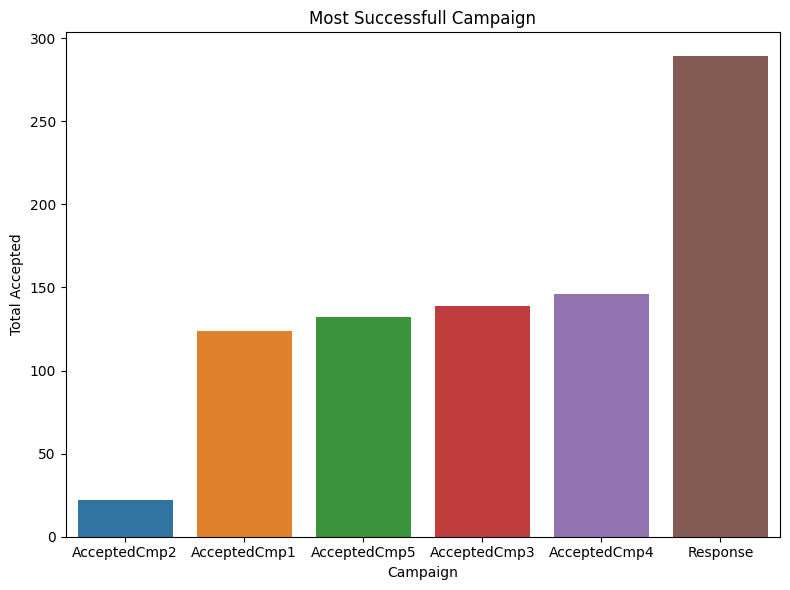

In [29]:
# Kampanye mana yang paling sukses?

from matplotlib.pyplot import annotate


cmp_viz = pd.DataFrame(df_copy[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Response']].sum(),columns=['Total']).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(cmp_viz.sort_values('Total'), x = 'index', y= 'Total')
plt.title('Most Successfull Campaign')
plt.xlabel('Campaign')
plt.ylabel('Total Accepted')
plt.tight_layout()


Observasi :
* Sedikit penjelasan bahwa variabel response diperoleh berdasarkan kampanye terakhir yang dilakukan / paling terbaru sedangkan variabel "Cmp" merupakan kampanye terdahulu. Variabel Response memperoleh engagement paling tinggi dibandingkan dengan campaign iklan lainnya. Sedangkan 
* campaign yang memiliki performa paling buruk terdapat pada campaign 2

In [30]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_Basic', 'education_Graduation', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'dependents', 'TotPurchases',
       'TotAccCamp', 'education_MasterDegree'],
      dtype='object')

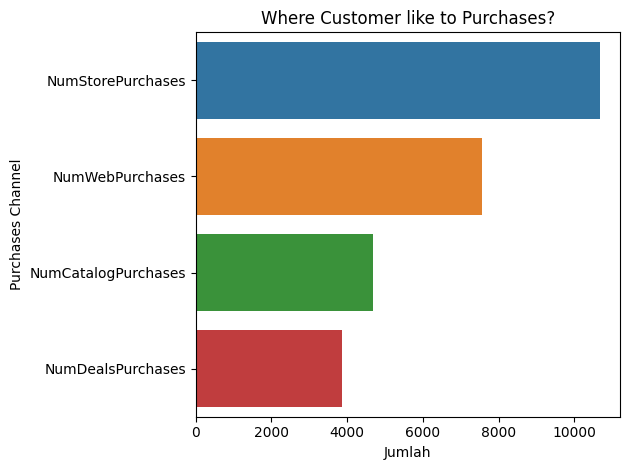

In [31]:
# Bagaimana preferensi pelanggan dalam berbelanja? (Toko, katalog, Website, deals/diskon)

Purchases_viz = pd.DataFrame(df_copy[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']].sum(),columns=['Jumlah']).reset_index()

sns.barplot(Purchases_viz.sort_values('Jumlah',ascending=False), x = 'Jumlah', y = 'index')
plt.title('Where Customer like to Purchases?')
plt.xlabel('Jumlah')
plt.ylabel('Purchases Channel')
plt.tight_layout()

Observasi :
* Berbelanja di toko langsung masih menjadi favorit pelanggan dalam berbelanja, hal ini juga didukung karena distribusi umur pelanggan didominasi 40 tahun ke atas. Ini bisa menjadi salah satu faktor mengapa banyak pelanggan masih menyukai berbelanja langsung di toko.

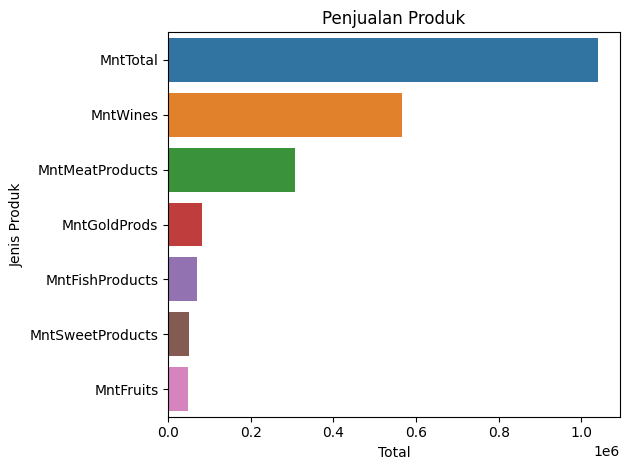

In [32]:
# Penjualan Produk paling besar?

from matplotlib.pyplot import legend


mnt_viz =  pd.DataFrame(df_copy[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','MntTotal']].sum(),columns = ['Total']).reset_index()
       
sns.barplot(mnt_viz.sort_values('Total',ascending=False), x='Total', y='index')
plt.title('Penjualan Produk')
plt.xlabel('Total')
plt.ylabel('Jenis Produk')
plt.tight_layout()

Observasi :
* Pelanggan banyak menghabiskan uang mereka untuk membeli produk - produk Wines dan daging. Sepertinya mengkonsumsi wines sudah menjadi kebiasaan dalam masyarakat disana.

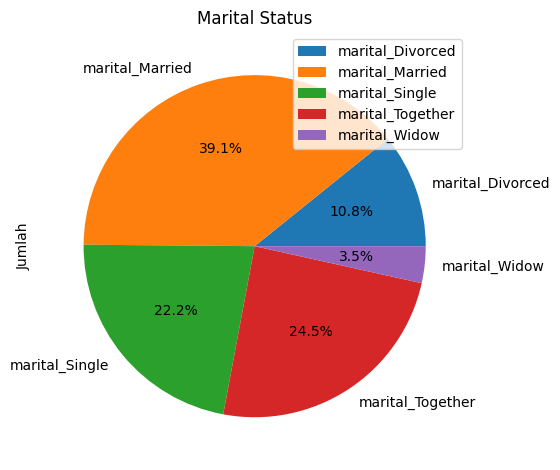

In [33]:
# Gambaran Umum mengenai Pelanggan
# Marital Status

from operator import index

from matplotlib.patches import Shadow


marital_viz = pd.DataFrame(df_copy[['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow']].sum(),columns=['Jumlah']).reset_index()

marital_viz['Jumlah'].plot.pie(autopct ='%1.1f%%', labels=marital_viz['index'], legend= True)
plt.title('Marital Status')
plt.legend(loc='upper right')
plt.tight_layout()


Observasi :
* Dari Pie chart tersebut, dapat kita ketahui status yang sudah menikah paling tinggi, lalu diikuti oleh status pasangan yang hidup bersama namu belum menikah dan posisi ketiga dengan status single/jomblo.

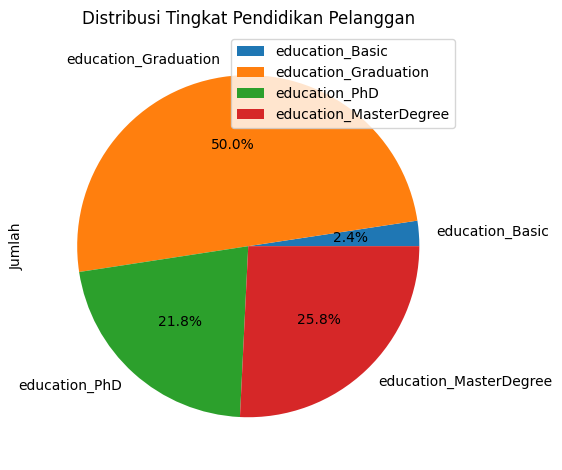

In [34]:
# Latar Belakang Pendidikan

education_viz = pd.DataFrame(df_copy[['education_Basic', 'education_Graduation',
'education_PhD','education_MasterDegree']].sum(),columns=['Jumlah']).reset_index()

education_viz['Jumlah'].plot.pie(autopct ='%1.1f%%', labels=education_viz['index'], legend= True)
plt.title('Distribusi Tingkat Pendidikan Pelanggan')
plt.tight_layout()

Observasi :
* Selanjutnya berdasarkan level pendidikan, sebesar 50% diperoleh level pendidikan sarjana, hal ini menjadikan sarjana sebagai distribusi terbesar dalam variabel ini. 
* Level pendidikan basic / dasar memiliki persentasi kecil sebesar 2.4%, artinya secara keseluruhan bahwa hampir semua pelanggan memiliki level yang tinggi. 

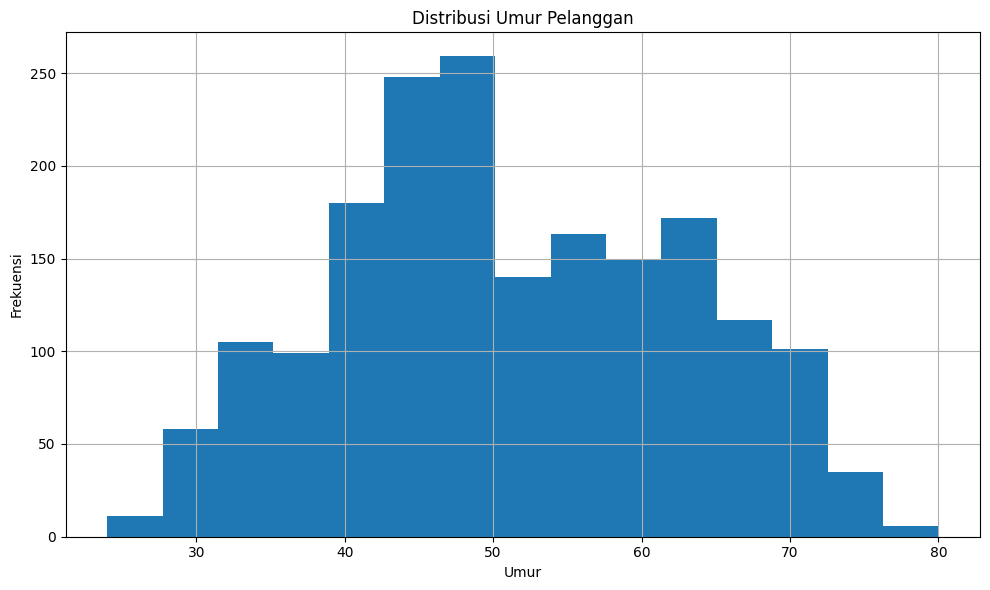

In [35]:
# Distribusi Umur

df_copy['Age'].hist(figsize=(10,6), bins=15)
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.tight_layout()

Observasi : 
1. Dari hasil histogram di atas, kita ketahui bahwa peta sebaran datanya cenderung ke kanan. Hal ini menandakan ada ketimpangan dalam median dan modusnya.
2. Kita juga mengetahui rentang umur paling banyak terdapat pada kisaran 40 - 50 tahun dengan jumlah mencapai 300, sedangkan usia paling tinggi berkisar 75 - 80 tahun.

In [36]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_Basic', 'education_Graduation', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'dependents', 'TotPurchases',
       'TotAccCamp', 'education_MasterDegree'],
      dtype='object')

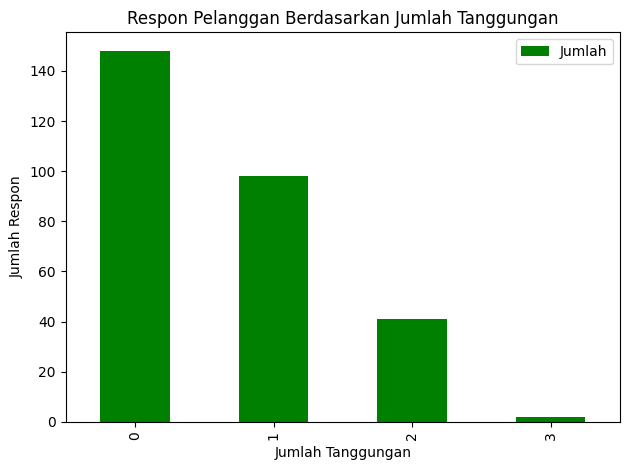

In [37]:
# Berapa banyak respon iklan terakhir kali berdasarkan jumlah tanggungan?

res_dep = df_copy.groupby('dependents')['Response'].sum().reset_index(name='Jumlah')
res_dep.plot.bar(x='dependents', y='Jumlah', color='Green')
plt.title('Respon Pelanggan Berdasarkan Jumlah Tanggungan')
plt.xlabel('Jumlah Tanggungan')
plt.ylabel('Jumlah Respon')
plt.tight_layout()

Observasi :
* Berdasarkan visualisasi, semakin banyak jumlah tanggungan/anak maka ketertarikan pelanggan untuk merespon sebuah iklan akan menurun. Ini dapat kita telusuri lebih lanjut, mengapa yang tidak memiliki tanggungan merespon lebih antusias?

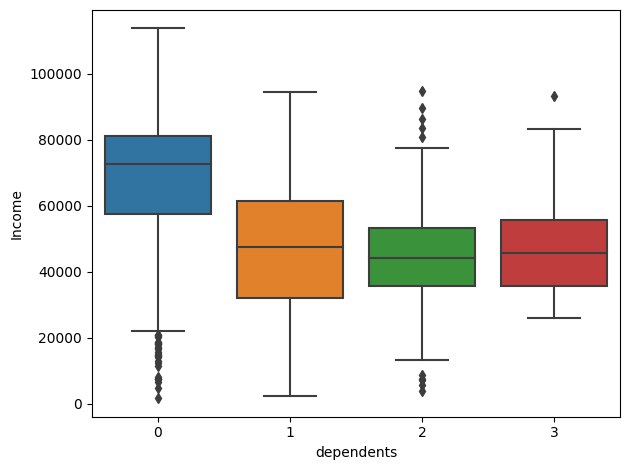

In [38]:
# Bagaimana gambaran mengenai tingkat penghasilan dengan jumlah anak?

sns.boxplot(y = df_copy['Income'], x = df_copy['dependents'])
plt.tight_layout()

Observasi :
* Ternyata, kelompok dengan penghasilan lebih tinggi terdapat pada pelanggan yang tidak memiliki tanggungan sedangkan pelanggan yang memiliki tanggungan memiliki penghasilan berkisar 35000 - 60000 dollar per tahun. Oleh karena itu, dapat kita pahami mengapa pelanggan yang tidak ada tanggungan lebih antusian dalam merespon iklan.

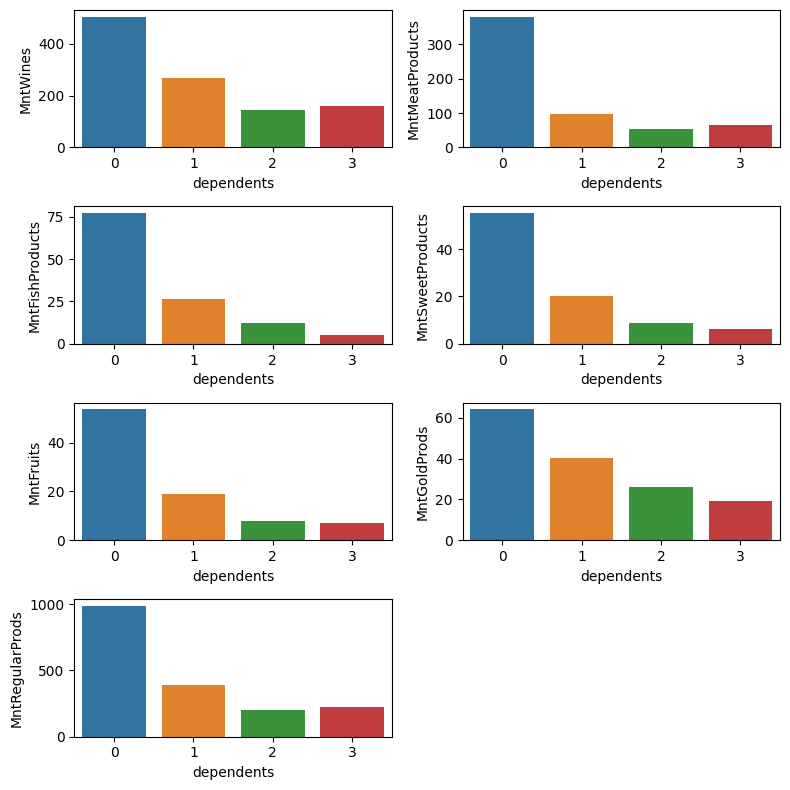

In [39]:
# Bagaimana pengeluaran pelanggan berdasarkan jumlah tanggungan?

plt.figure(figsize=(8,8))

plt.subplot(4,2,1)
sns.barplot(x='dependents', y='MntWines', data=df_copy.groupby('dependents')['MntWines'].mean().reset_index())

plt.subplot(4,2,2)
sns.barplot(x='dependents', y='MntMeatProducts', data=df_copy.groupby('dependents')['MntMeatProducts'].mean().reset_index())

plt.subplot(4,2,3)
sns.barplot(x='dependents', y='MntFishProducts', data=df_copy.groupby('dependents')['MntFishProducts'].mean().reset_index())

plt.subplot(4,2,4)
sns.barplot(x='dependents', y='MntSweetProducts', data=df_copy.groupby('dependents')['MntSweetProducts'].mean().reset_index())

plt.subplot(4,2,5)
sns.barplot(x='dependents', y='MntFruits', data=df_copy.groupby('dependents')['MntFruits'].mean().reset_index())

plt.subplot(4,2,6)
sns.barplot(x='dependents', y='MntGoldProds', data=df_copy.groupby('dependents')['MntGoldProds'].mean().reset_index())

plt.subplot(4,2,7)
sns.barplot(x='dependents', y='MntRegularProds', data=df_copy.groupby('dependents')['MntRegularProds'].mean().reset_index())

plt.tight_layout()

Observasi :
* Secara garis besar, pelanggan yang tidak memiliki tanggungan lebih banyak melakukan pembelian di seluruh tipe produk lalu diikuti oleh pelanggan yang hanya memiliki tanggungan 1, namun selisihnya cukup jauh
* Bahkan untuk kategori produk seperti buah, daging, ikan yang seharusnya lebih banyak dikonsumsi oleh keluarga memiliki selisih yang jauh dengan yang tidak punya tanggungan.

Visualisasi selanjutnya, kita akan berfokus pada status pernikahan dan latar belakang pendidikan dalam berbelanja. 
1. Transform terlebih dahulu data marital dan education yang sebelumnya wider menjadi longer.
2. Hitung rata - rata berapa banyak uang yang dihabiskan oleh pelanggan untuk produk terntu.

In [40]:
# Menjadikan Marital status pada 1 kolom

df_copy['marital_Married']=df_copy['marital_Married'].astype(str).replace({'1':'5','0':''})
df_copy['marital_Single']=df_copy['marital_Single'].astype(str).replace({'1':'4','0':''})
df_copy['marital_Together']=df_copy['marital_Together'].astype(str).replace({'1':'3','0':''})
df_copy['marital_Widow']=df_copy['marital_Widow'].astype(str).replace({'1':'2','0':''})
df_copy['marital_Divorced']=df_copy['marital_Divorced'].astype(str).replace({'0':''})
#Now all columns contain different numbers for different marital status, lets join them in one column.
df_copy['marital_status']=df_copy["marital_Widow"]+df_copy['marital_Together']+df_copy['marital_Single']+df_copy['marital_Married']+df_copy['marital_Divorced']
#Next, we map numbers into different categorical values.
df_copy['marital_status']=df_copy['marital_status'].map({'1':'Divorced', '2':'Widow','3':'Together','4':'Single','5':'Married'})

In [41]:
df_copy.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_Basic', 'education_Graduation', 'education_PhD', 'MntTotal',
       'MntRegularProds', 'AcceptedCmpOverall', 'dependents', 'TotPurchases',
       'TotAccCamp', 'education_MasterDegree', 'marital_status'],
      dtype='object')

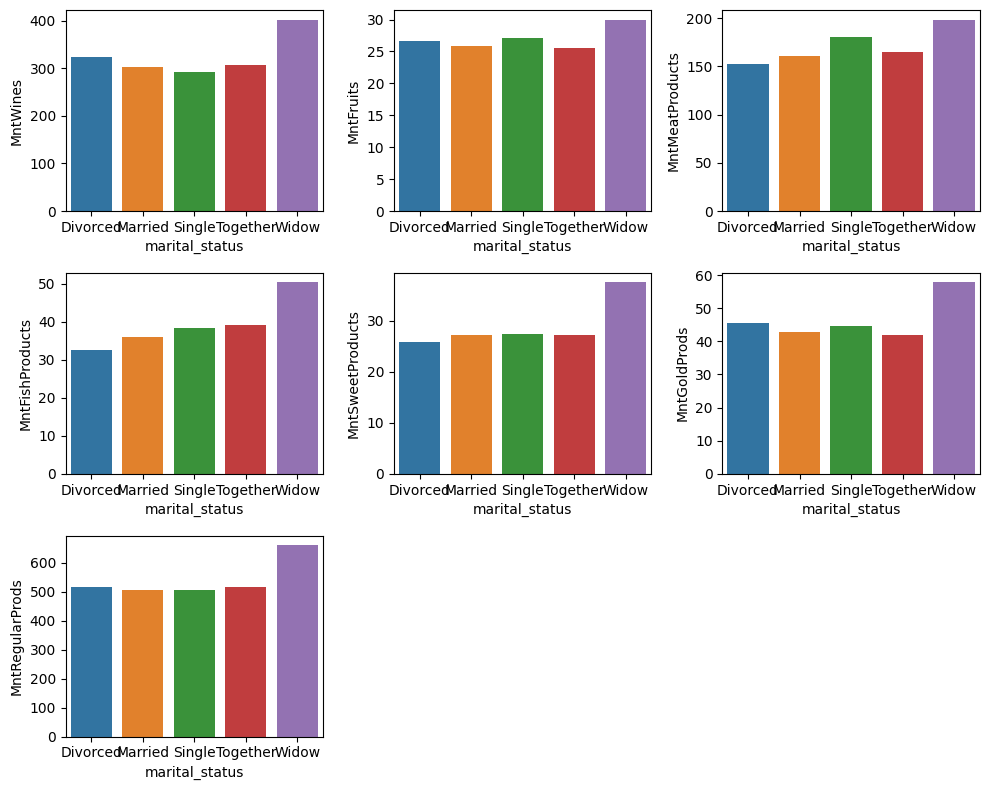

In [42]:
# Rata - rata pengeluaran pelanggan terhadap produk berdasarkan status pernikahannya.

plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
sns.barplot(x='marital_status', y='MntWines', data=df_copy.groupby('marital_status')['MntWines'].mean().reset_index())

plt.subplot(3,3,2)
sns.barplot(x='marital_status', y='MntFruits', data=df_copy.groupby('marital_status')['MntFruits'].mean().reset_index())

plt.subplot(3,3,3)
sns.barplot(x='marital_status', y='MntMeatProducts', data=df_copy.groupby('marital_status')['MntMeatProducts'].mean().reset_index())

plt.subplot(3,3,4)
sns.barplot(x='marital_status', y='MntFishProducts', data=df_copy.groupby('marital_status')['MntFishProducts'].mean().reset_index())

plt.subplot(3,3,5)
sns.barplot(x='marital_status', y='MntSweetProducts', data=df_copy.groupby('marital_status')['MntSweetProducts'].mean().reset_index())

plt.subplot(3,3,6)
sns.barplot(x='marital_status', y='MntGoldProds', data=df_copy.groupby('marital_status')['MntGoldProds'].mean().reset_index())

plt.subplot(3,3,7)
sns.barplot(x='marital_status', y='MntRegularProds', data=df_copy.groupby('marital_status')['MntRegularProds'].mean().reset_index())

plt.tight_layout()

Observasi :
* Menarik, ternyata Widow secara keseluruhan menghabiskan uang lebih banyak dibandingkan dengan status lainnya, namun populasi widow sangat sedikit dibandingkan dengan yang lain.

In [43]:
# Menjadikan Education level menjadi 1 kolom

df_copy['education_Basic']=df_copy['education_Basic'].astype(str).replace({'0':''})
df_copy['education_Graduation']=df_copy['education_Graduation'].astype(str).replace({'1':'2','0':''})
df_copy['education_MasterDegree']=df_copy['education_MasterDegree'].astype(str).replace({'1':'3','0':''})
df_copy['education_PhD']=df_copy['education_PhD'].astype(str).replace({'1':'4','0':''})
df_copy['education_level']=df_copy['education_Basic']+df_copy['education_Graduation']+df_copy['education_MasterDegree']+df_copy['education_PhD']
df_copy['education_level']=df_copy['education_level'].map({'1':'Basic','2':'Graduation','3':'Master','4':'PhD'})

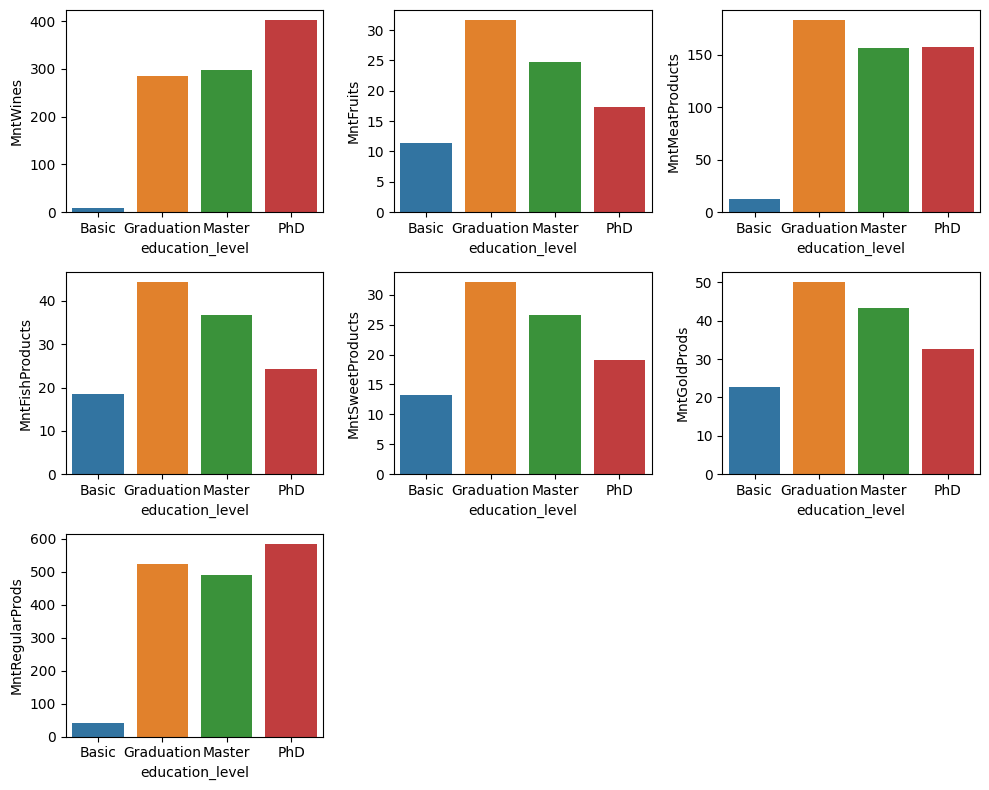

In [44]:
# Rata - rata pengeluaran pelanggan terhadap produk berdasarkan tingkat pendidikannya.

plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
sns.barplot(x='education_level', y='MntWines', data=df_copy.groupby('education_level')['MntWines'].mean().reset_index())

plt.subplot(3,3,2)
sns.barplot(x='education_level', y='MntFruits', data=df_copy.groupby('education_level')['MntFruits'].mean().reset_index())

plt.subplot(3,3,3)
sns.barplot(x='education_level', y='MntMeatProducts', data=df_copy.groupby('education_level')['MntMeatProducts'].mean().reset_index())

plt.subplot(3,3,4)
sns.barplot(x='education_level', y='MntFishProducts', data=df_copy.groupby('education_level')['MntFishProducts'].mean().reset_index())

plt.subplot(3,3,5)
sns.barplot(x='education_level', y='MntSweetProducts', data=df_copy.groupby('education_level')['MntSweetProducts'].mean().reset_index())

plt.subplot(3,3,6)
sns.barplot(x='education_level', y='MntGoldProds', data=df_copy.groupby('education_level')['MntGoldProds'].mean().reset_index())

plt.subplot(3,3,7)
sns.barplot(x='education_level', y='MntRegularProds', data=df_copy.groupby('education_level')['MntRegularProds'].mean().reset_index())

plt.tight_layout()

Observasi : 
* Pada variabel level pendidikan, hasil yang diperoleh sedikit bervariasi. Pada produk wines dan regular pelanggan dengan level pendidikan Phd memiliki rata - rata konsumsi lebih tinggi dibandingkan dengan yang lain, sedangkan variabel lainnya rata - rata konsumsi banyak pada pelanggan dengan level pendidikan Sarjana.

#### What We Learn?
1. Variabel __pendapatan__ dan berapa banyak __tanggungan__ merupakan faktor kuat mempengaruhi kemampuan pelanggan dalam berbelanja.
2. Semakin tinggi __pendapatan__ dan rendahnya jumlah __tanggungan__ maka kemungkinan merespon iklan akan lebih besar.
3. Distribusi __umur__ pelanggan paling banyak berada pada kisaran 40 - 50 tahun dan histogram lebih condong ke kanan. Ini menjelaskan mengapa masih banyak pelanggan yang berminat berbelanja di toko secara langsung.
4. Berdasarkan __pengeluaran untuk produk__, pelanggan yang tidak memiliki __tanggungan__ rata - rata mengeluarkan uang lebih banyak dibandingkan yang memiliki anak, bahkan untuk produk keseharian seperti __daging, ikan atau buah - buahan__ yang umum dikonsumsi oleh keluarga. 
5. Faktor __status pernikahan__ memiliki selisih yang kecil antara 1 variabel dengan variabel lainnya dalam hal konsumsi produk. Hal yang menarik adalah Variabel __Widow__ yang paling tinggi dalam mengeluarkan uangnya untuk membeli berbagai macam produk.
6. Faktor level pendidikan memberikan hasil yang agak berbeda, dimana variabel __Phd__ dengan rata - rata konsumsi tinggi pada __Wines__ dan __Regular__ produk, sedangkan produk lainnya didominasi oleh variabel __Graduatian__.

#### Recommendation
1. Buat iklan yang menawarkan __deals/diskon__ kepada pelanggan yang memiliki __tanggungan__ dan karena uji korelasi memperlihatkan relasi yang positif terhadap kedua variabel tersebut.
2. Produk populer adalah __Wines__ dan __Meat__, langkah yang dapat kita ambil dapat berupa iklan promosi untuk produk - produk yang kurang laku sehingga dapat meningkatkan penjualan.
3. Saat ini, __Toko__ menjadi tempat favorit untuk berbelanja karena demografi umur yang rata - rata diatas 40 tahun. Keuntungan ini dapat perusahaan pertahankan dengan terus melakukan engagement kepada pelanggan dengan demografi tersebut. Pembelian secara __Website__ mempunyai potensi untuk meningkat dengan cara mencari pelanggan baru yang usia lebih muda.

#### Penutup
Mungkin saya cukupkan sampai disini dulu untuk EDA dan Visualisasi pada dataset marketing ini. Jika ada kekeliruan, kritik dan saran mohon diinformasikan kepada saya karena saya yakin masih banyak ruang untuk peningkatan. Terima kasih

#### Further Analysis
Dalam versi ini hanya berfokus kepada EDA sederhana dan melakukan visualisasi untuk mendapatkan gambaran mengenai pelanggan. Pada versi ke depannya, saya akan mencoba mengaplikasin beberapa metode machine learning seperti classification dengan variabel dependent Response. Jika prosesnya cukup panjang maka saya akan buat notebook tersendiri.